In [11]:
import pandas as pd
from sklearn.decomposition import PCA as sklearnPCA
import matplotlib.pyplot as plt
from sklearn import random_projection
from sklearn.neighbors.dist_metrics import DistanceMetric
matrix = pd.read_csv('generated_dataset_4.csv', index_col=0)
matrix.shape

(400, 10000)

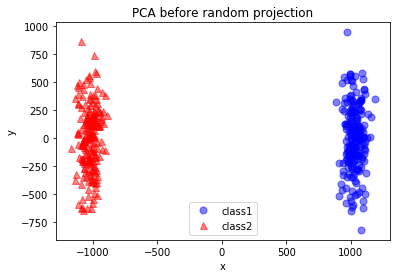

In [13]:
NUMBER = 200
sklearn_pca = sklearnPCA(n_components=2)
sklearn_transf = sklearn_pca.fit_transform(matrix)
plt.plot(sklearn_transf[0:NUMBER, 0], sklearn_transf[0:NUMBER, 1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(sklearn_transf[NUMBER:NUMBER * 2, 0], sklearn_transf[NUMBER:NUMBER * 2, 1], '^', markersize=7, color='red', 
         alpha=0.5, label='class2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('PCA before random projection')
plt.show()

In [14]:
transformer = random_projection.SparseRandomProjection(n_components=1000)
X_random = transformer.fit_transform(matrix)

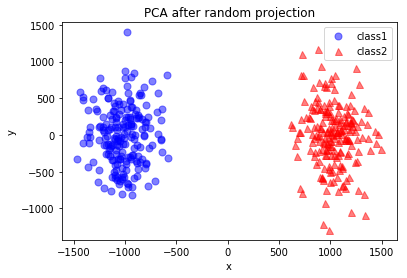

In [15]:
sklearn_transf = sklearn_pca.fit_transform(X_random)
plt.plot(sklearn_transf[0:NUMBER, 0], sklearn_transf[0:NUMBER, 1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(sklearn_transf[NUMBER:NUMBER * 2, 0], sklearn_transf[NUMBER:NUMBER * 2, 1], '^', markersize=7, color='red', 
         alpha=0.5, label='class2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('PCA after random projection')
plt.show()

In [16]:
dist = DistanceMetric.get_metric('euclidean')
original_dist = dist.pairwise(matrix)
original_dist

array([[    0.        ,  7121.71038754,  7085.55381746, ...,
         7355.53471245,  7384.83062156,  7400.0128107 ],
       [ 7121.71038754,     0.        ,  7093.27551197, ...,
         7351.0193195 ,  7392.2493483 ,  7327.79986394],
       [ 7085.55381746,  7093.27551197,     0.        , ...,
         7361.03652474,  7407.97745462,  7375.93556089],
       ..., 
       [ 7355.53471245,  7351.0193195 ,  7361.03652474, ...,
            0.        ,  7112.28489122,  7028.52363906],
       [ 7384.83062156,  7392.2493483 ,  7407.97745462, ...,
         7112.28489122,     0.        ,  7062.69125693],
       [ 7400.0128107 ,  7327.79986394,  7375.93556089, ...,
         7028.52363906,  7062.69125693,     0.        ]])

In [17]:
random_dist = dist.pairwise(X_random)
random_dist

array([[    0.        ,  7093.45701781,  7017.21175863, ...,
         7587.92894704,  7501.50105432,  7273.08496335],
       [ 7093.45701781,     0.        ,  7010.6085163 , ...,
         7376.96499211,  7465.72049011,  7330.97971296],
       [ 7017.21175863,  7010.6085163 ,     0.        , ...,
         7690.12417356,  7582.26638749,  7372.89889673],
       ..., 
       [ 7587.92894704,  7376.96499211,  7690.12417356, ...,
            0.        ,  7209.83744194,  7087.4080901 ],
       [ 7501.50105432,  7465.72049011,  7582.26638749, ...,
         7209.83744194,     0.        ,  7033.45364685],
       [ 7273.08496335,  7330.97971296,  7372.89889673, ...,
         7087.4080901 ,  7033.45364685,     0.        ]])

In [22]:
transformer = random_projection.SparseRandomProjection(n_components=5)
X_random_bad = transformer.fit_transform(matrix)

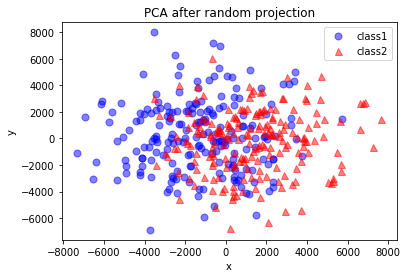

In [23]:
sklearn_transf = sklearn_pca.fit_transform(X_random_bad)
plt.plot(sklearn_transf[0:NUMBER, 0], sklearn_transf[0:NUMBER, 1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(sklearn_transf[NUMBER:NUMBER * 2, 0], sklearn_transf[NUMBER:NUMBER * 2, 1], '^', markersize=7, color='red', 
         alpha=0.5, label='class2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('PCA after random projection')
plt.show()

In [24]:
random_dist_bad = dist.pairwise(X_random_bad)
random_dist_bad

array([[    0.        ,  7837.67839685,  2297.12155067, ...,
         4960.28636317,  4045.54549501,  3480.04440042],
       [ 7837.67839685,     0.        ,  7011.38689201, ...,
         5594.05759681,  6652.29708004,  8291.49358499],
       [ 2297.12155067,  7011.38689201,     0.        , ...,
         4611.05525882,  3578.39608859,  3854.29283146],
       ..., 
       [ 4960.28636317,  5594.05759681,  4611.05525882, ...,
            0.        ,  4773.99321903,  4093.82134494],
       [ 4045.54549501,  6652.29708004,  3578.39608859, ...,
         4773.99321903,     0.        ,  4330.5092222 ],
       [ 3480.04440042,  8291.49358499,  3854.29283146, ...,
         4093.82134494,  4330.5092222 ,     0.        ]])